# Photonic Lantern Parametric Simulation

In [1]:
# Import required libraries
import os
import sys
import subprocess
import numpy as np
import matplotlib.pyplot as plt

# Import custom modules
from rsoft_cad.rsoft_mspl import ModeSelectiveLantern
from rsoft_cad.rsoft_simulations import run_simulation
from rsoft_cad.utils.plot_utils import visualise_lantern

In [2]:
def make_parameterised_lantern(
    launch_mode="LP01",
    taper_factor=21,
    taper_length=80000,
    sim_type="breamprop",
    highest_mode="LP02",
):
    """
    Create a parameterised photonic lantern configuration
    """
    # Create Mode Selective Photonic Lantern instance
    mspl = ModeSelectiveLantern()

    # Create lantern without writing to design file
    core_map = mspl.create_lantern(
        highest_mode=highest_mode,
        launch_mode=launch_mode,
        opt_name=launch_mode,
        savefile=False,  # Hold off on saving design file
        taper_factor=taper_factor,
        taper_length=taper_length,
    )

    # Calculate simulation boundaries based on capillary diameter
    core_pos_x = 0
    core_pos_y = 0
    bpm_range = mspl.cap_dia
    boundary_max = core_pos_x + bpm_range / 2
    boundary_min = core_pos_x - bpm_range / 2
    boundary_max_y = core_pos_y + bpm_range / 2
    boundary_min_y = core_pos_y - bpm_range / 2

    # Simulation parameters
    sim_params = {
        "boundary_max": boundary_max,
        "boundary_min": boundary_min,
        "boundary_max_y": boundary_max_y,
        "boundary_min_y": boundary_min_y,
        "domain_min": 0,
        "grid_size": 0.5,
        "grid_size_y": 0.5,
        "sim_tool": "ST_BEAMPROP",
        "fem_nev": 1,  # Find more eigenmodes
        "mode_output_format": "OUTPUT_REAL_IMAG",
        "slice_display_mode": "DISPLAY_CONTOURMAPXY",
        "field_output_format": "OUTPUT_REAL_IMAG",
        "mode_launch_type": 2,
    }

    # Update global simulation parameters
    mspl.update_global_params(**sim_params)

    # Generate filename
    file_name = f"{sim_type}_{mspl.design_filename}"
    design_filename = os.path.join(
        mspl.design_filepath,
        file_name,
    )

    # Write design file
    mspl.write(design_filename)

    return mspl.design_filepath, file_name, core_map

In [3]:
def visualise_lantern_layout(core_map):
    """
    Visualize the lantern layout
    """
    # Use the provided visualization utility
    fig, ax = visualise_lantern(core_map)
    plt.title("Photonic Lantern Mode Layout")
    return fig

In [4]:
def run_lantern_simulation(
    launch_mode="LP01", taper_factor=12.5, taper_length=80000, sim_type="breamprop"
):
    """
    Run a complete lantern simulation workflow
    """
    # Generate parameterised lantern
    filepath, filename, core_map = make_parameterised_lantern(
        launch_mode=launch_mode,
        taper_factor=taper_factor,
        taper_length=taper_length,
        sim_type=sim_type,
    )

    # Run simulation
    simulation_result = run_simulation(
        filepath,
        filename,
        sim_package="bsimw32",
        prefix_name=f"{launch_mode}_taper_{taper_length}",
        save_folder="lantern_simulations",
        hide_sim=True,
    )

    return filepath, filename, core_map

## Explore Different Lantern Configurations

Circuit written to output\mspl_6_cores\breamprop_mspl_6_cores_LP01.ind
Running simulation ...



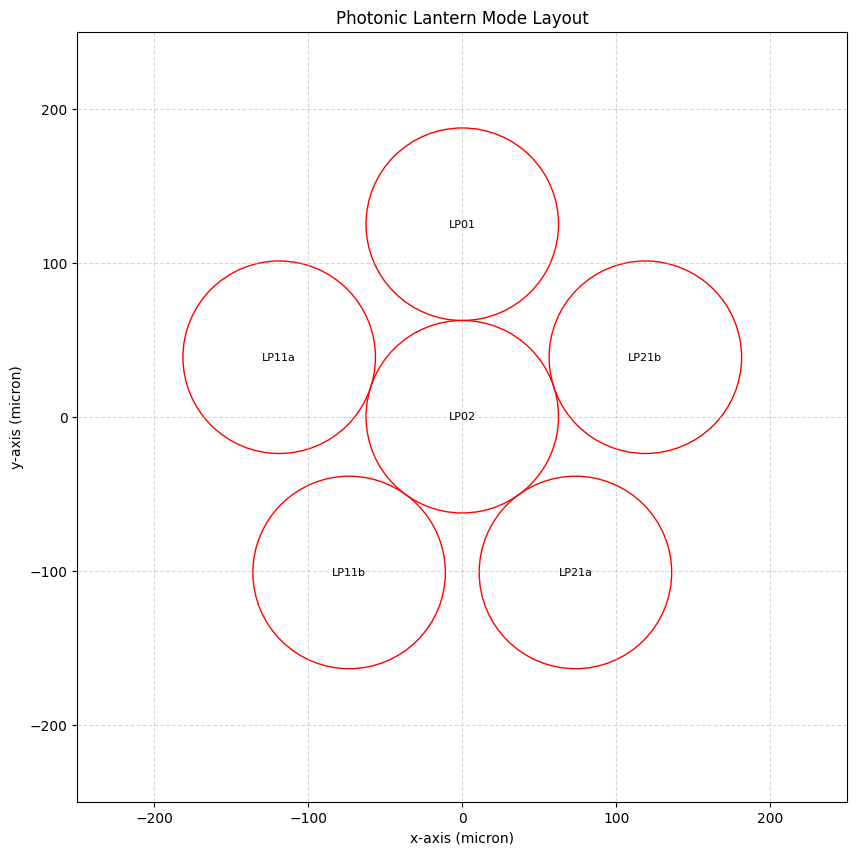

In [5]:
# Example Configuration 1: Single Mode Lantern
filepath, filename, core_map = run_lantern_simulation(
    launch_mode="LP01", taper_factor=15, taper_length=55000
)

# Visualize the layout
fig = visualise_lantern_layout(core_map)
plt.show()

## Taper Length Exploration

Circuit written to output\mspl_6_cores\breamprop_mspl_6_cores_LP01.ind
Running simulation ...

Circuit written to output\mspl_6_cores\breamprop_mspl_6_cores_LP01.ind
Running simulation ...

Circuit written to output\mspl_6_cores\breamprop_mspl_6_cores_LP01.ind
Running simulation ...



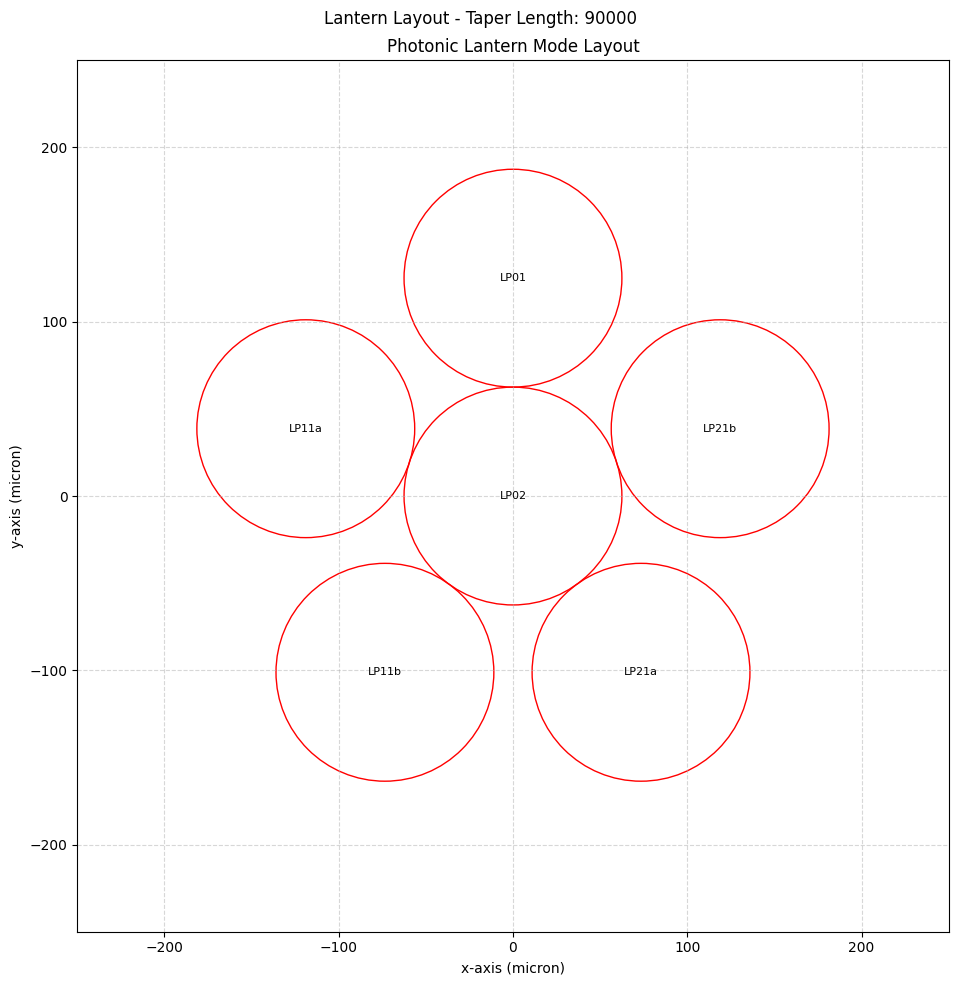

In [6]:
# Explore different taper lengths
taper_lengths = [50000, 70000, 90000]
results = []

for taper_length in taper_lengths:
    filepath, filename, core_map = run_lantern_simulation(
        launch_mode="LP01", taper_length=taper_length
    )
    results.append(
        {
            "taper_length": taper_length,
            "filepath": filepath,
            "filename": filename,
            "core_map": core_map,
        }
    )

# Visualize each configuration
fig = visualise_lantern_layout(core_map)
plt.suptitle(f"Lantern Layout - Taper Length: {taper_length}")
plt.tight_layout()
plt.show()